<a href="https://colab.research.google.com/github/AIGeekProgrammer/MiscellaneousAI/blob/main/Logistic%20Regression/Logistic_Regression_in_PyTorch_with_Dataset_and_DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook: Logistic Regression in PyTorch with Dataset and DataLoader<br>
Author: Szymon Manduk<br>
Created: 14 Feb 2022<br>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.nn import Linear
from torch.optim import SGD

In [ ]:
from torch.utils.data import Dataset, DataLoader
from sklearn import datasets

In [ ]:
# Data factory class inheriting from Dataset and using sklearn 
# make_blobs function to generate 2 blobs of data
class BlobFactory(Dataset):
  def __init__(self, n_datapoints, centers, spread):
    self.X, self.y = datasets.make_blobs(n_datapoints, centers=centers, random_state=123, cluster_std=spread)
    self.X = torch.Tensor(self.X)
    self.y = torch.Tensor(self.y).reshape((len(self.y), 1))  # making it a matrix not a vector
    print(self.X.size(), self.y.size())  # just debugging sizes

  def __len__(self):
    return len(self.y)

  def __getitem__(self, index):
    datapoint = self.X[index]
    label = self.y[index]
    return datapoint, label
  
  def display(self):
    plt.scatter(self.X[:, 0], self.X[:,1], c=self.y)

In [ ]:
dataset = BlobFactory(500, centers=[[2, 2], [-2,-2]], spread=1)

torch.Size([500, 2]) torch.Size([500, 1])


In [ ]:
len(dataset)

500

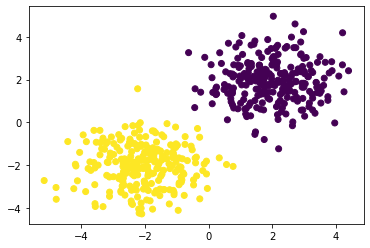

In [ ]:
dataset.display()

In [ ]:
# Wrap Dataset with Dataloader to get data in batches
train_dataset = DataLoader(dataset, shuffle=True, batch_size=20)

In [ ]:
# Take a look at the first batch
next(iter(train_dataset))

[tensor([[-2.3974, -2.4230],
         [-1.6285, -2.1586],
         [ 0.6291,  1.6675],
         [ 3.1705,  1.4491],
         [ 1.4813,  1.9376],
         [-2.3412, -2.4898],
         [ 2.1660,  3.6019],
         [ 2.3074,  1.3888],
         [ 3.0127,  2.2787],
         [-2.9850, -1.4943],
         [-2.1846, -4.2362],
         [ 3.1759,  2.6801],
         [-1.7854, -2.4022],
         [ 0.5881,  0.1231],
         [-0.2791, -3.5684],
         [-0.9836, -1.0664],
         [-2.5471, -2.0001],
         [-2.6616, -2.9297],
         [ 1.0027,  0.9000],
         [-1.3086, -0.0568]]), tensor([[1.],
         [1.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.],
         [1.],
         [0.],
         [1.]])]

In [ ]:
# Create simple linear model with logistic function at the end
class LR(nn.Module):
  def __init__(self, n_inputs, n_outputs):
    super().__init__()
    self.linear = Linear(n_inputs, n_outputs)
  def forward(self, x):
    return torch.sigmoid(self.linear(x))

In [ ]:
model = LR(2, 1)

In [ ]:
# Set the loss function and the optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [ ]:
# Training loop
epochs = 2000
losses = []
for epoch in range(epochs):
  for x, y in train_dataset:
    optimizer.zero_grad()
    yhat = model.forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
  losses.append(loss)
  if epoch % 100 == 0:
    print(f'Epoch #:{epoch} with loss={loss}')   

Epoch #:0 with loss=1.073981523513794
Epoch #:100 with loss=0.5761992335319519
Epoch #:200 with loss=0.4365277886390686
Epoch #:300 with loss=0.2179902046918869
Epoch #:400 with loss=0.23425452411174774
Epoch #:500 with loss=0.1459444910287857
Epoch #:600 with loss=0.13564397394657135
Epoch #:700 with loss=0.08871660381555557
Epoch #:800 with loss=0.07876753807067871
Epoch #:900 with loss=0.14681324362754822
Epoch #:1000 with loss=0.09751300513744354
Epoch #:1100 with loss=0.08765988051891327
Epoch #:1200 with loss=0.08480743318796158
Epoch #:1300 with loss=0.06358841806650162
Epoch #:1400 with loss=0.07428714632987976
Epoch #:1500 with loss=0.0669214203953743
Epoch #:1600 with loss=0.08838639408349991
Epoch #:1700 with loss=0.05513429641723633
Epoch #:1800 with loss=0.02493479661643505
Epoch #:1900 with loss=0.0654819905757904


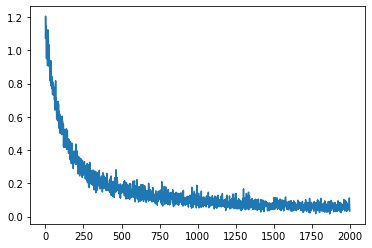

In [ ]:
# Plot learning curve
plt.plot(losses)

In [ ]:
# Get model parameters to visualize class separation
w, b = model.parameters()

In [ ]:
x1 = np.array([-4, 4])  # line goes from -4 to 4 on X axis
y1 = w[0][0].item()*x1 + b[0].item()

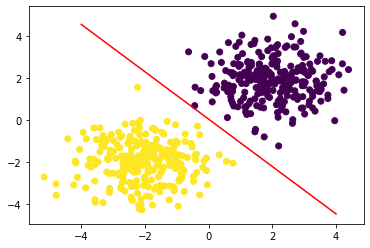

In [ ]:
dataset.display()
plt.plot(x1, y1, 'r')